# Radius-density-mass relationship for small planets around M stars
**Author: Hannu Parviainen**</br>
**Edited: 4. September 2023** 

Here we create a radius-density-mass relationship for small planets orbiting M stars. This works exactly the same way as creating the relationship for M dwarfs, but we use a TEPCat catalog instead of the curated M star catalog by R. Luque.

In [1]:
%matplotlib inline

import pandas as pd

from astropy import units as u
from matplotlib.pyplot import subplots, rc, setp
from corner import corner

from spright import RMEstimator
from spright.io import read_tepcat

In [3]:
names, radii, masses = read_tepcat('../spright/data/TEPCat_M_20230522.csv')
rme = RMEstimator(nsamples=100, names=names, radii=radii, masses=masses)

In [4]:
rme.optimize()

Global optimisation:   0%|          | 0/500 [00:00<?, ?it/s]

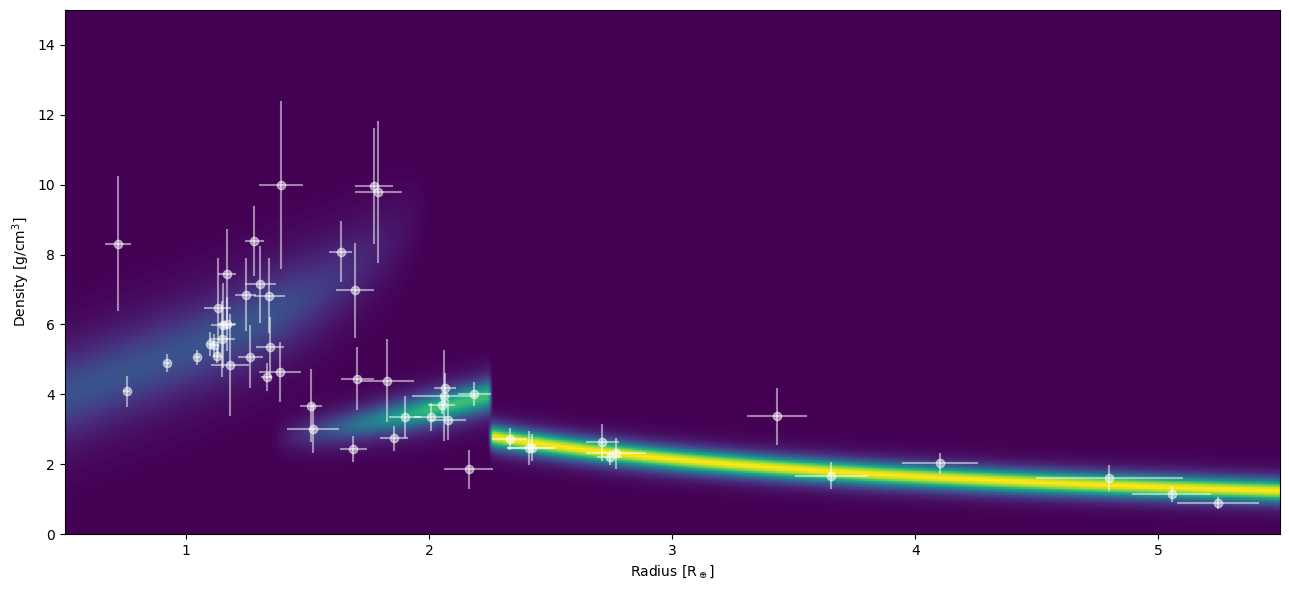

In [5]:
fig, ax = subplots(figsize=(13,6))
rme.plot_radius_density(ax=ax)
setp(ax, xlim=(0.5,5.5))
fig.tight_layout()

In [6]:
rme.sample(10000, thin=50, repeats=6)

MCMC sampling:   0%|          | 0/6 [00:00<?, ?it/s]

Run 1/6:   0%|          | 0/10000 [00:00<?, ?it/s]

Run 2/6:   0%|          | 0/10000 [00:00<?, ?it/s]

Run 3/6:   0%|          | 0/10000 [00:00<?, ?it/s]

Run 4/6:   0%|          | 0/10000 [00:00<?, ?it/s]

Run 5/6:   0%|          | 0/10000 [00:00<?, ?it/s]

Run 6/6:   0%|          | 0/10000 [00:00<?, ?it/s]

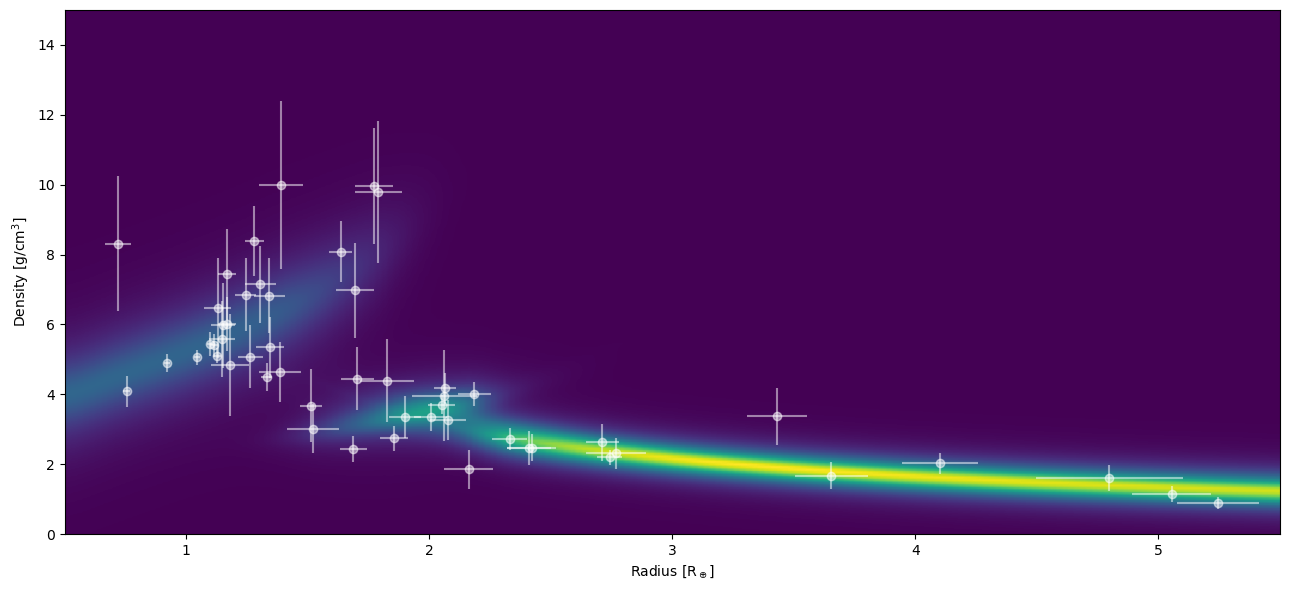

In [7]:
fig, ax = subplots(figsize=(13,6))
rme.plot_radius_density(max_samples=250, ax=ax, plot_contours=False)
setp(ax, xlim=(0.5,5.5))
fig.tight_layout()

In [8]:
df = rme.posterior_samples()

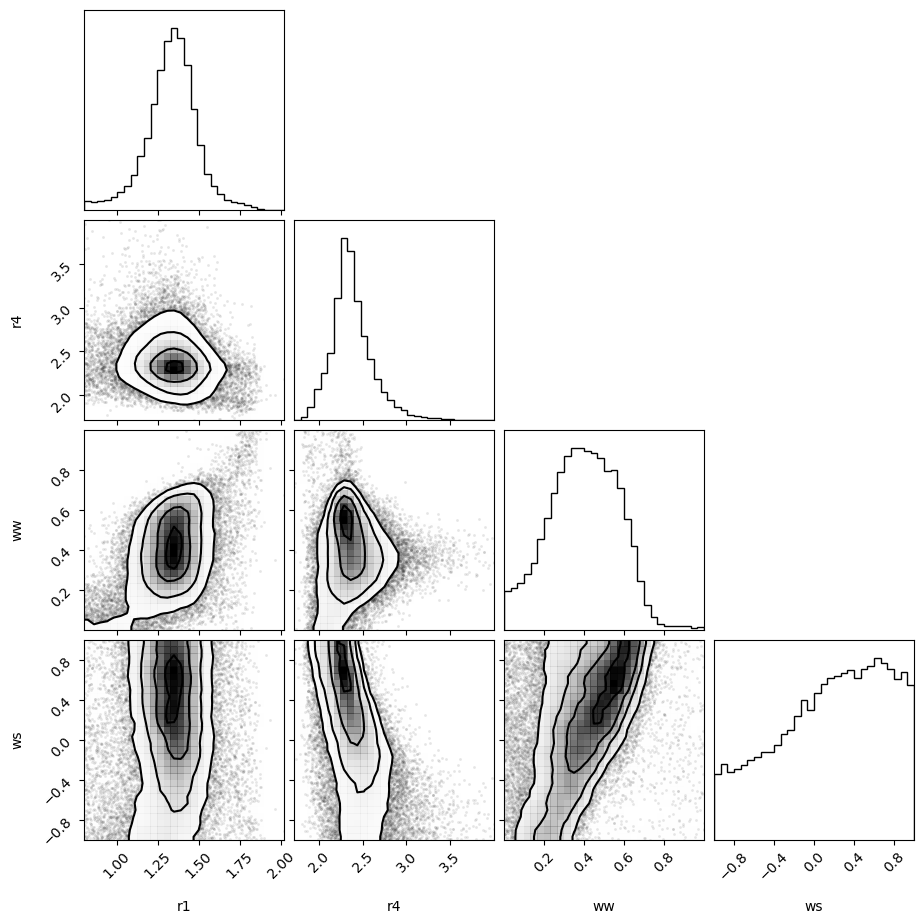

In [9]:
corner(data=df.iloc[:,:4].values, labels=df.columns, smooth=0.75, bins=30);

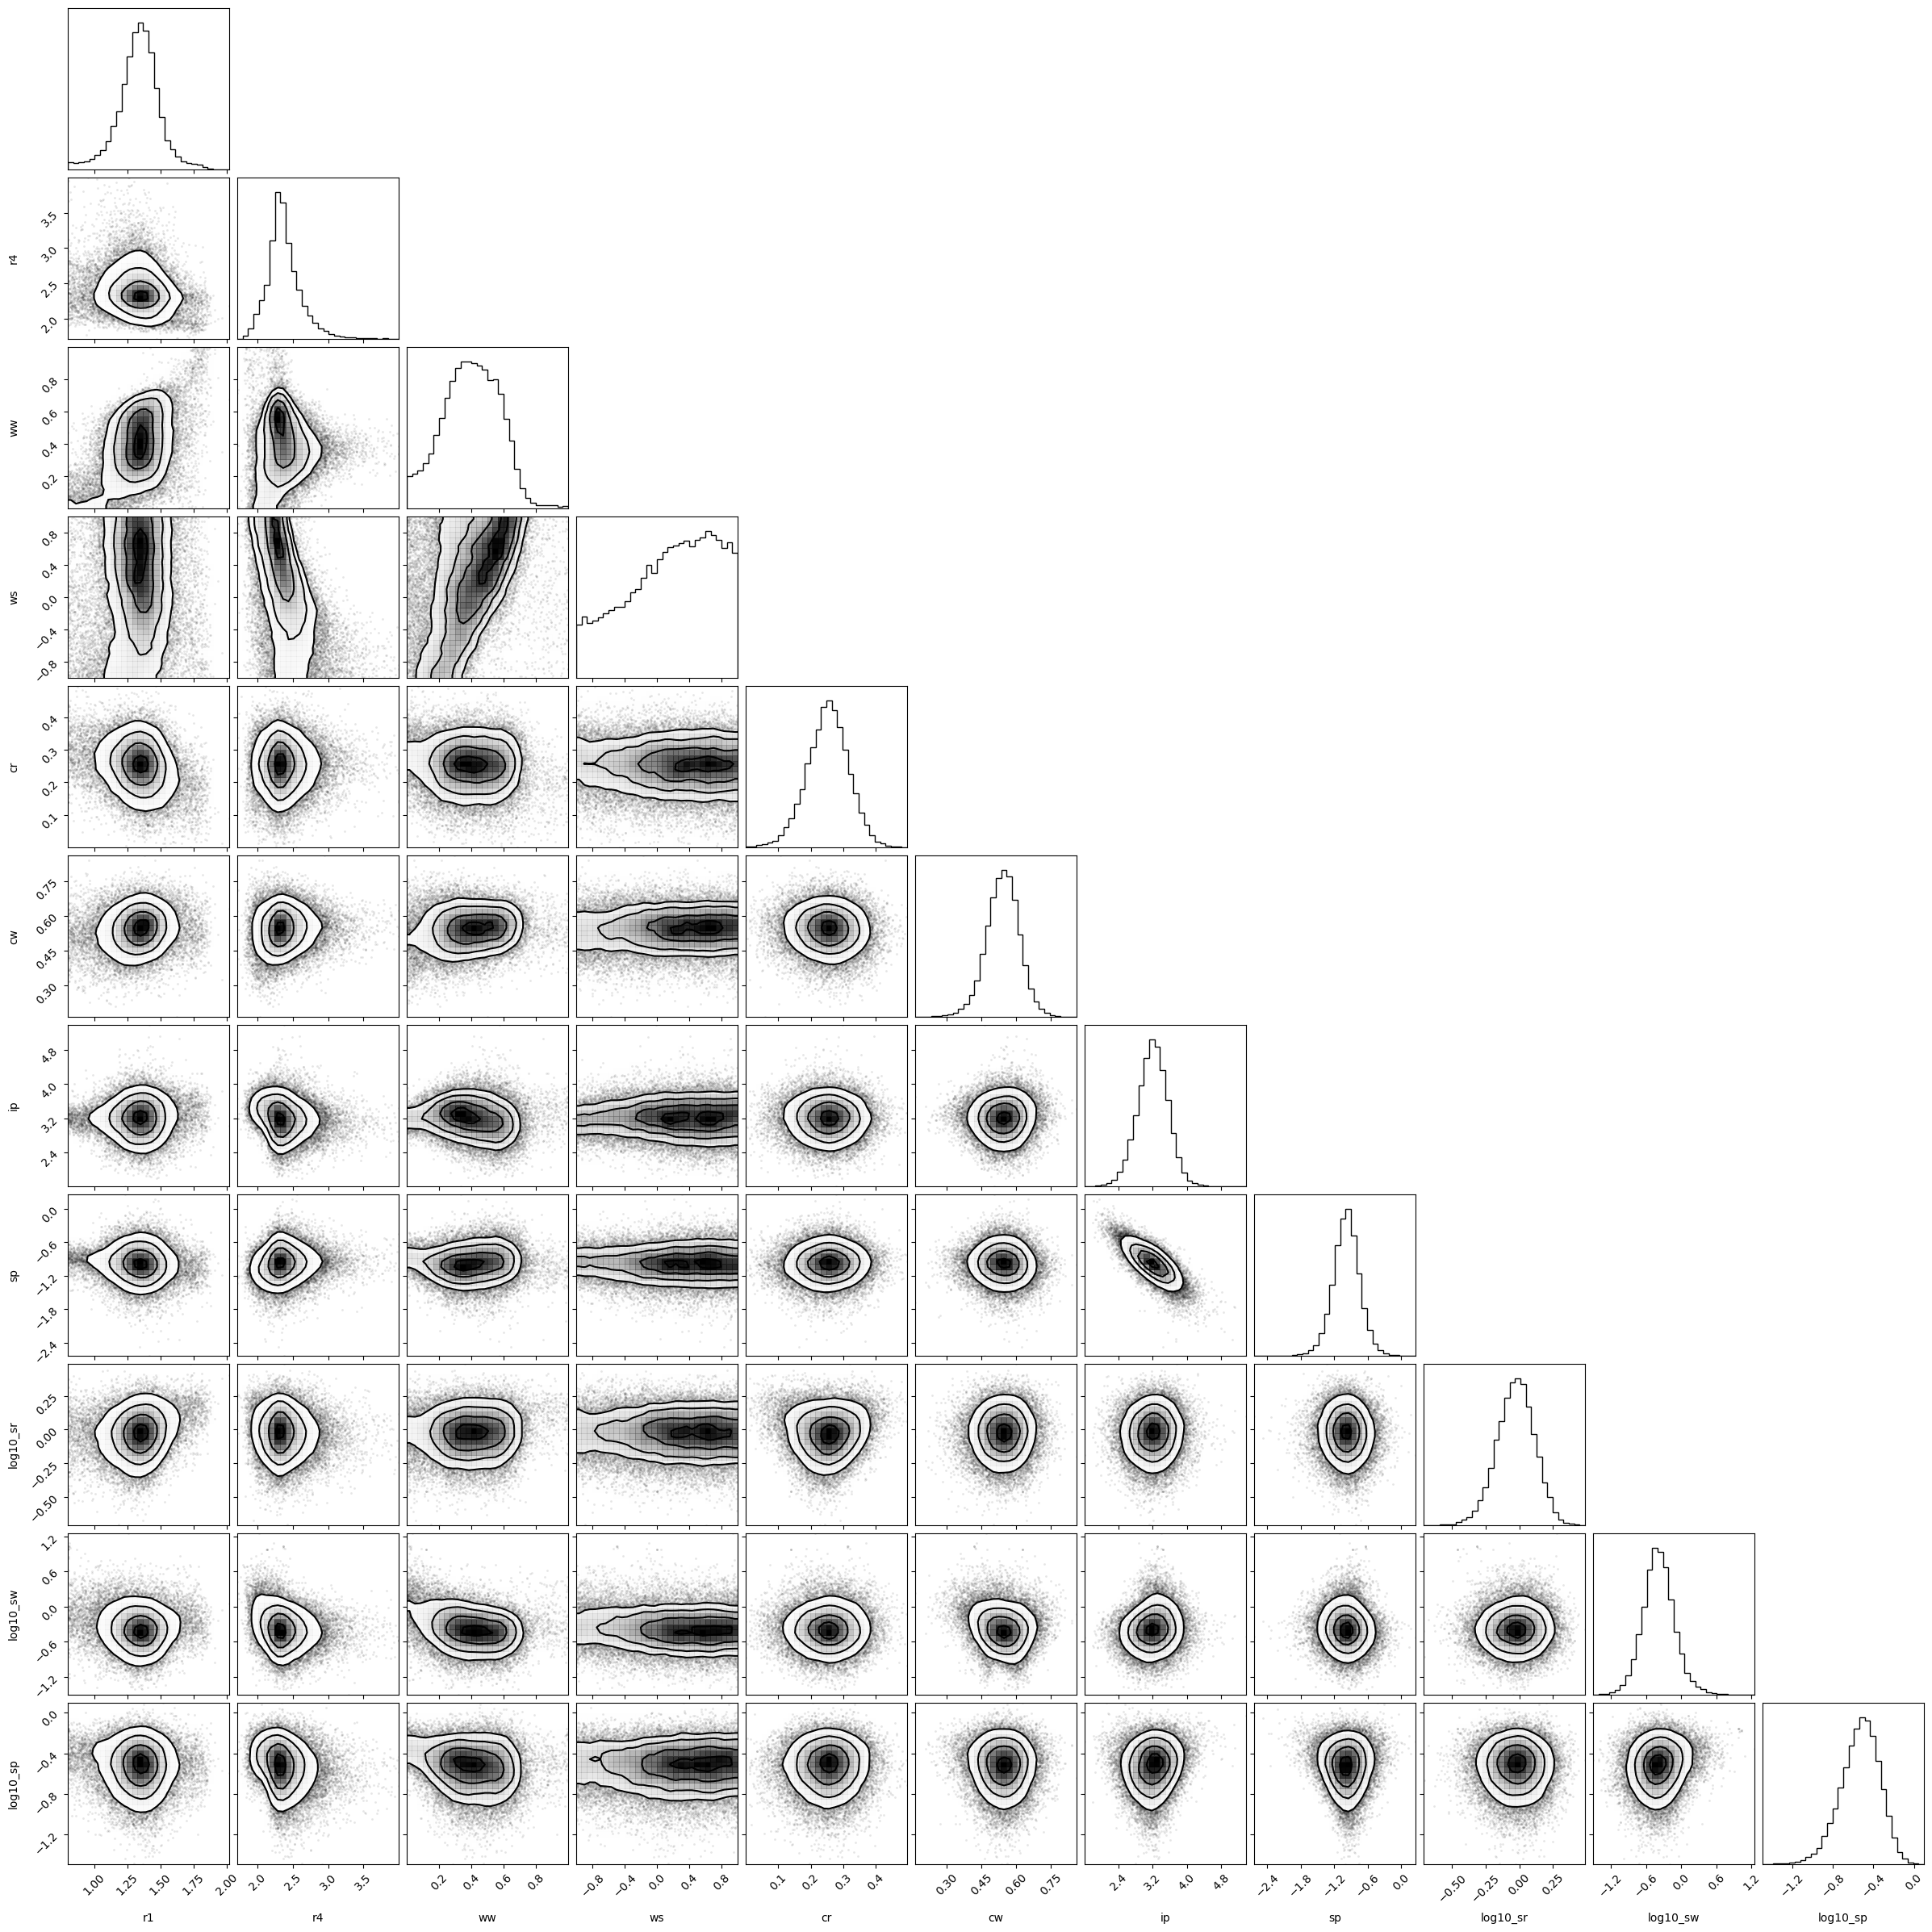

In [10]:
corner(data=df.values, labels=df.columns, smooth=0.75, bins=30);

## Compute and save the posterior and ICDF maps

In [11]:
rme.compute_maps(nsamples=5000, rres=400, dres=200, pres=200)

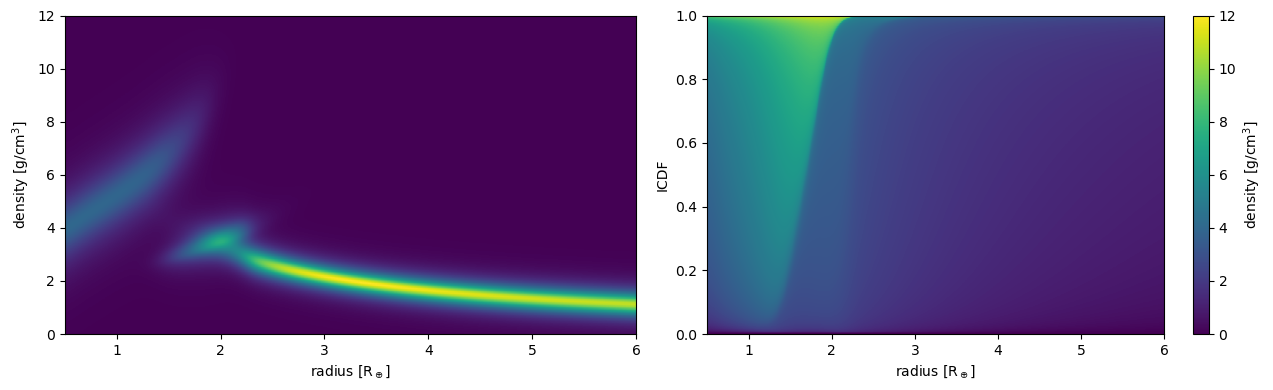

In [12]:
fig, axs = subplots(1, 2, figsize=(13, 4), sharex='all')
rme.rdmap.plot_map(ax=axs[0])
rme.rdmap.plot_icdf(ax=axs[1])
fig.tight_layout()

In [13]:
rme.save('tepcat_m.fits')

---

<center>
©2023 Hannu Parviainen
</center>